In [83]:
import time
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans,MiniBatchKMeans
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

### Import Dataset

In [37]:
X=pd.read_csv('C:\\Users\\212731239\\Desktop\\Personal\\Bits\\Unsuperwised\\Input Files\\K-means.csv')

In [ ]:
X=X.to_numpy()

#### Visualize Data

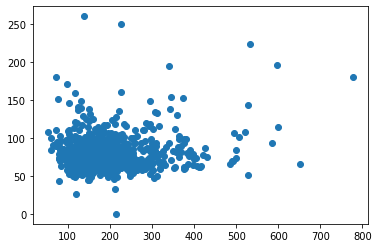

In [8]:
plt.scatter(X['max_rooms_capacity'],X['AvgDailyRate'])

#### Identify number of clusters

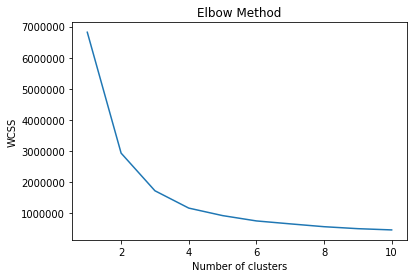

In [100]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### In the first line, we create a KMeans object and pass it 2 as value for n_clusters parameter. Next, you simply have to call the fit method on kmeans and pass the data that you want to cluster, which in this case is the X 

In [86]:
kmeans = KMeans(n_clusters=2)
t0 = time.time()
kmeans.fit(X)
t_batch = time.time() - t0


##### We are now creating a minibatch Kmeans and object and using fit function for same

In [87]:
mbk = MiniBatchKMeans(n_clusters=2, batch_size=45,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

##### Printing the different centres K-mean and mini-batch kmeans

In [89]:
print(kmeans.cluster_centers_)
print(mbk.cluster_centers_)


[[161.73521127  77.92885778]
 [339.62837838  84.44776754]]
[[255.59322034  77.03153524]
 [140.22765957  77.64291164]]


In [99]:
print((t_mini_batch-t_batch),'is difference in train time in seconds')

0.009297609329223633 is difference in train time in seconds


##### we are plotting the first column of the X array against the second column, however in this case we are also passing kmeans.labels_ as value for the c parameter that corresponds to labels. The cmap='rainbow' parameter is passed for choosing the color type for the different data points. The output graph should look like this:

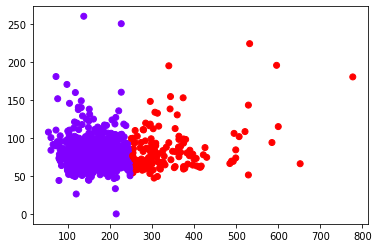

In [16]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

##### Now let's plot the points along with the centroid coordinates of each cluster to see how the centroid positions effects clustering. Again we will use two clusters to see the effect of centroids. Execute the following script to draw the graph:

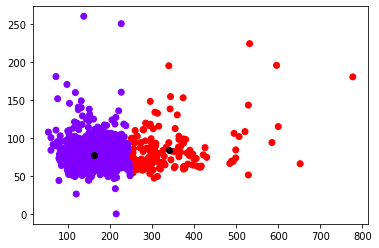

In [91]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')